<H1><FONT COLOR="blue">
911 Calls For Service  - תיעוד שיחות למוקד 911
</FONT></H1>  

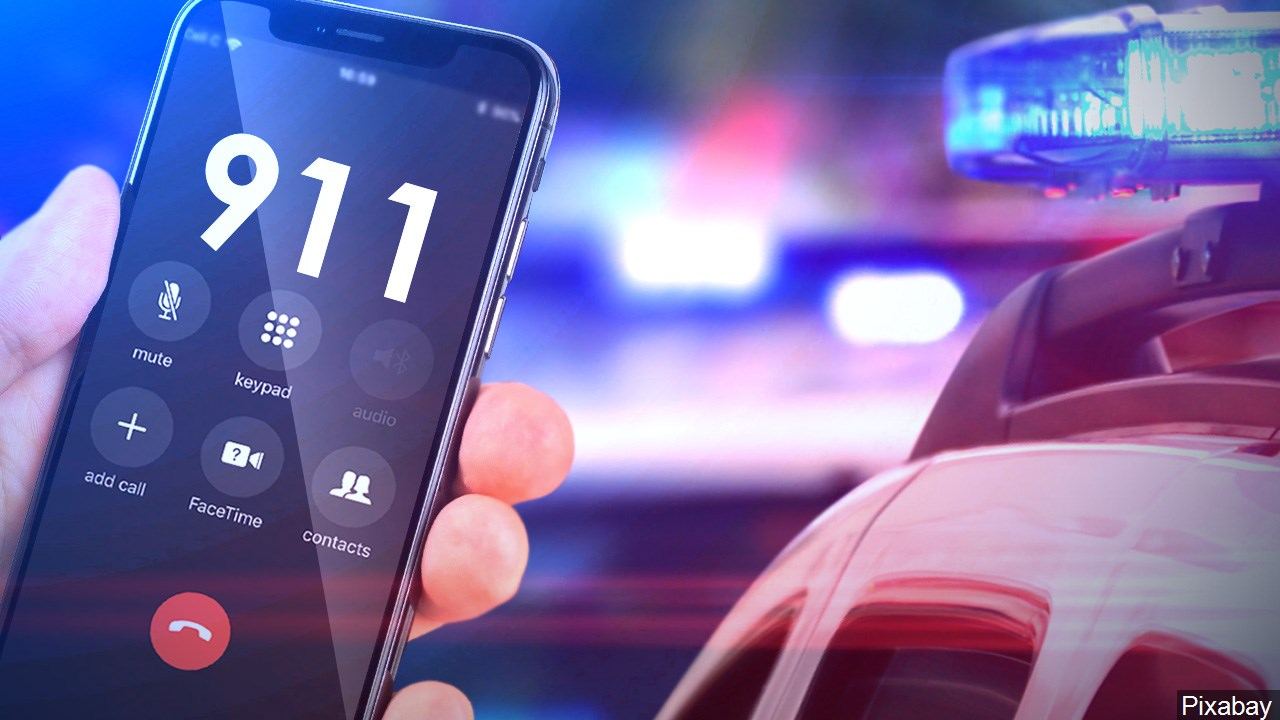

In [1]:
import IPython 
url1= 'https://quincy-network.s3.ca-central-1.amazonaws.com/wp-content/uploads/sites/13/2021/03/911Phone.jpg'
IPython.display.Image(url1, width = 800)

In [2]:
#!pip install folium

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [4]:
url = 'https://raw.githubusercontent.com/tomzaks450/Project2021/main/911_Calls_For_Service.csv'
police = pd.read_csv(url, sep=',', error_bad_lines=False, index_col=False, dtype='unicode')

### קריאת הקובץ

In [5]:
police.head()

,incident_address,zip_code,priority,calldescription,category,call_timestamp,officerinitiated,intaketime,dispatchtime,neighborhood,longitude,latitude,oid
0,Harrell St & Hern St,48213,2,UNKNOWN PROBLEM,UNKPROB,2017/01/01 00:00:22+00,No,1.8,115.8,Chandler Park,-82.98194616,42.39723604,130134
1,Grand River Ave & Woodmont Ave,48227,2,TRAFFIC STOP,TRF STOP,2017/01/01 00:00:51+00,Yes,0,0,Grand River-St Marys,-83.20890277,42.39691696,130135
2,Roxbury St & Britain St,48224,2,ASSAULT AND BATTERY,AB IP/JH,2017/01/01 00:01:44+00,No,3.9,NaN,Yorkshire Woods,-82.94841103,42.42261359,130136
3,NaN,,3,SPECIAL ATTENTION,SPCL ATT,2017/01/01 00:01:46+00,Yes,0,0,NaN,-83.11156021,42.30036688,130137
4,Joy Rd & Westwood,48228,2,TRAFFIC STOP,TRF STOP,2017/01/01 00:03:32+00,Yes,0,0,Warrendale,-83.2310885,42.35764876,130138


### מספר השורות והעמודות

In [6]:
print("The data has", police.shape[0], "rows and", police.shape[1], "columns.")

The data has 92490 rows and 13 columns.


## עשרת סוגי השיחות הנפוצות ביותר

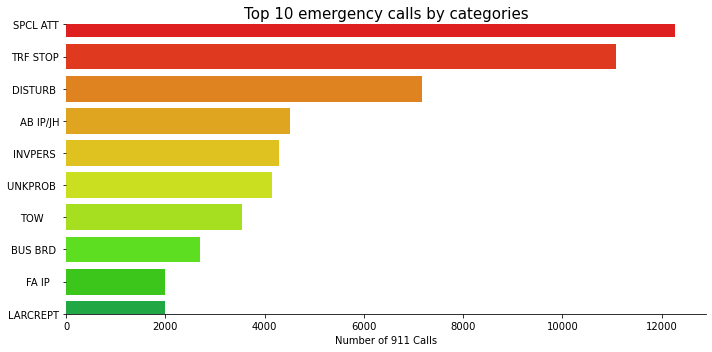

In [7]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.countplot(y='category', data=police, order=police['category'].value_counts().index, palette='prism')
sns.despine(bottom=False, left=True)
axes.set_ylim([9, 0])
axes.set_title('Top 10 emergency calls by categories', size=15)
axes.set(xlabel='Number of 911 Calls', ylabel='')
plt.tight_layout()

In [8]:
#SPCL ATT = SPECIAL ATTENTION / DETAIL = מקרים מיוחדים
#TRF STOP = TRAFFIC STOP = עצירת תנועה 
#DISTURB= DISTURBANCE = הפרעה
#AB IP\JH = ASSAULT AND BATTERY = תקיפה וחבלה
#INVPERS = INVESTIGATE PERSON = חקירת אדם
#UNKPROB = UNKNOWN PROBLEM = בעיה לא ידועה
#TOW = TOWING DETAIL =  גרירה
#BUS BRD = BUS BOARDING = פיקוח אוטובוסים
#FA IP = FELONIOUS ASSAULT IP = תקיפה פלילית
#LARCREPT = LARCENY REPORT = דוח גניבה

###### לפי הגרף ניתן לראות שעשרת נושאי השיחה מתעסקים במקרים מיוחדים, עצירות תנועה, הפרעה לציבור,תקיפה וחבלה, חקירות, בעיות לא ידועות, גרירת רכבים, פיקוח אוטובוסים, תקיפה על רקע פלילי ואירועי גניבה.

## מספר שיחות למוקד פר יום

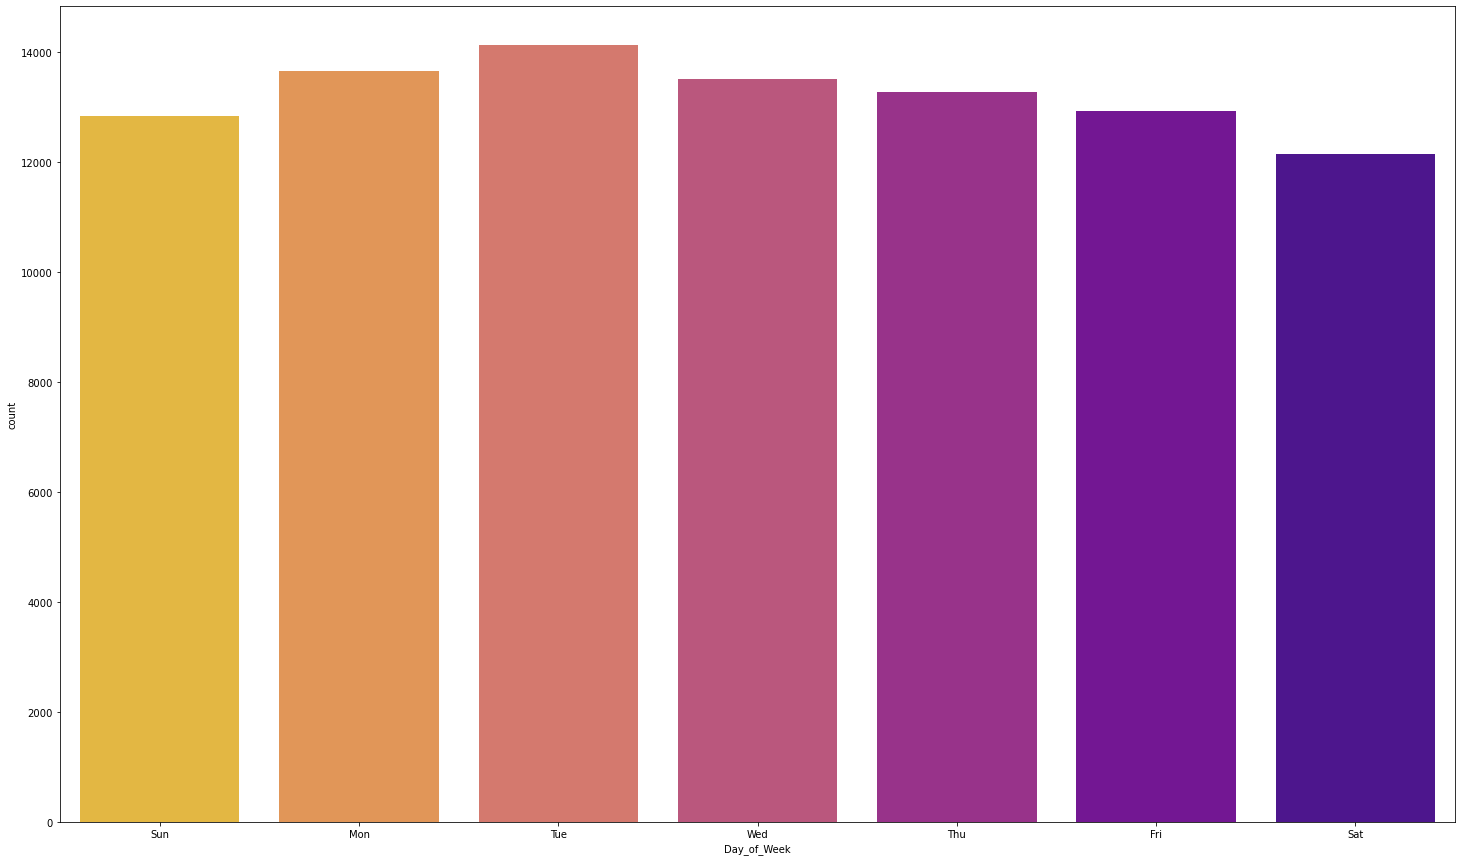

In [9]:
police['call_timestamp']=pd.to_datetime(police['call_timestamp'])
time=police['call_timestamp'].iloc[0]
police['Hour']=police['call_timestamp'].apply(lambda time:time.hour)
police['Month']=police['call_timestamp'].apply(lambda time:time.month)
police['Day_of_Week']=police['call_timestamp'].apply(lambda time:time.dayofweek)
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
police['Day_of_Week']= police['Day_of_Week'].map(dmap)
plt.figure(figsize=(25,15))
sns.countplot(x='Day_of_Week',data=police ,palette='plasma_r')

##### .בדקנו את הקשר בין מספר השיחות למוקד לבין אמצע או סוף השבוע 
##### ,אנו שיערנו שבסוף השבוע (ימי שבת וראשון) כמות הקריאות תגדל
##### .אך בגרף המוצג ניתן לראות שככל שסוף השבוע מתקרב, מספר הקריאות קטן
##### .אולי ניתן להסיק מכך שאנשים בסוף השבוע מעדיפים להיות בבית, דבר שיוצר פחות חיכוכים


#### גרף שיחות לפי תאריכים

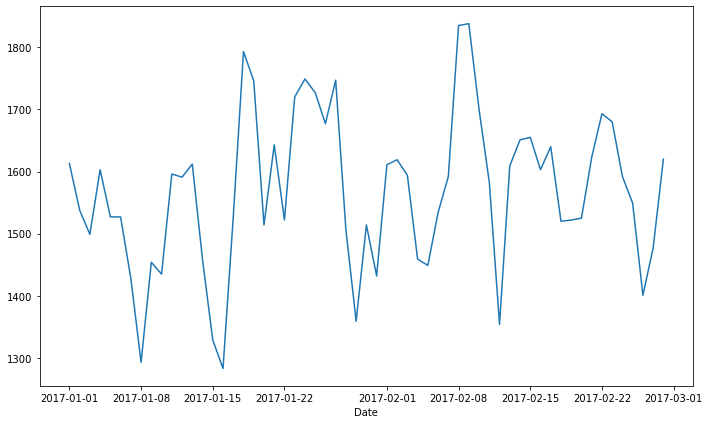

In [10]:
police['Date']=police['call_timestamp'].apply(lambda time:time.date)
byDate = police.groupby(['Date']).count()
plt.figure(figsize=(10, 6))
byDate['oid'].plot()
plt.tight_layout()

##### מצאנו שהתאריך עם הכי הרבה שיחות הוא 08.02.2017 יום שלישי

### ממוצע שיחות ליום

In [11]:
count_per_day=police.groupby('Date')[['oid']].count()
print("Average calls per day is",count_per_day.mean()[0],".")

Average calls per day is 1567.6271186440679 .


## השוואה בין כמות השיחות לפי יום ושעה

In [12]:
P_day_hour = police.pivot_table(index='Day_of_Week', columns='Hour',values='oid', aggfunc='count')
P_day_hour = P_day_hour.loc[['Mon','Tue','Wed','Thu','Fri','Sat','Sun']]
P_day_hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_of_Week,,,,,,,,,,,,,,,,,,,,,
Mon,591,560,561,510,524,460,395,359,337,296,...,568,688,654,754,720,747,800,941,924,771
Tue,706,669,623,551,483,462,383,397,343,291,...,615,659,746,744,785,684,845,966,924,741
Wed,639,620,573,580,473,474,401,358,320,269,...,558,644,685,694,717,724,785,881,876,750
Thu,686,601,600,501,493,470,428,408,341,290,...,604,602,653,625,721,695,803,865,814,690
Fri,636,586,565,523,476,501,414,412,347,293,...,562,597,638,602,659,651,647,808,858,724
Sat,625,609,577,564,569,570,509,498,356,315,...,462,556,528,556,532,559,552,669,687,683
Sun,678,646,639,605,631,660,632,604,477,380,...,430,481,547,553,562,511,582,659,693,623


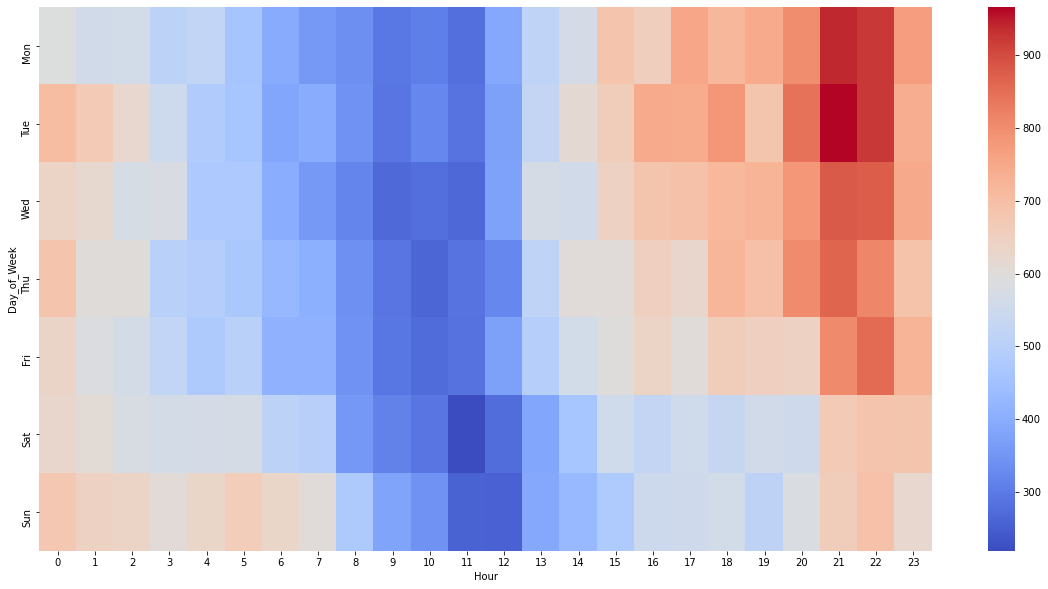

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(P_day_hour,cmap= 'coolwarm')

##### .בדקנו את מספר הקריאות בכל שעה ביום והפקנו מפת חום שתראה לנו את הנתונים בצורה ויזואלית
##### ניתן לראות שבשעות הבוקר מ06:00-13:00 יש את הכי פחות שיחות למוקד. 
##### .החל מ13:00 חלה עלייה הדרגתית בכל ימות השבוע עד לשעה 22:00, לאחר מכן חלה ירידה נוספת בכמות השיחות
##### ביום שלישי בשעה 21:00 יש את העומס הגדול ביותר על המוקד ולכן יש לתגבר את המוקד ביום זה בשעות הערב המאוחרות


## נוכחות קצין באירוע 

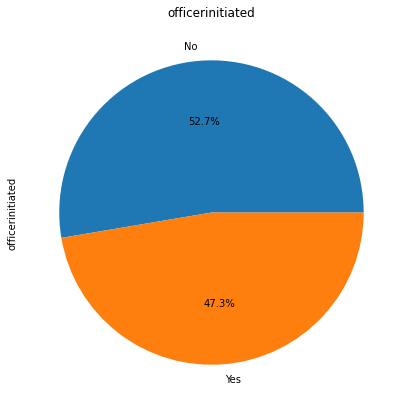

In [14]:
plt.figure(figsize=(10,7))
plt.title('officerinitiated')
police['officerinitiated'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

## קצין באירוע לעומת עדיפות אירוע

##### המסווגת את הקריאות לפי עדיפות יציאה לאירוע priority בקובץ הנתונים יש עמודת 
##### .רמות הסיווג מחולקות למספרים 1-5, כאשר המספר 1 הוא האירוע הדחוף ביותר
##### .או רווח , כדי לעבוד עם עמודה זו, נמחק את השורות הכוללות ערכים אלו P-יש מספר קטן של קריאות המסווגות כ

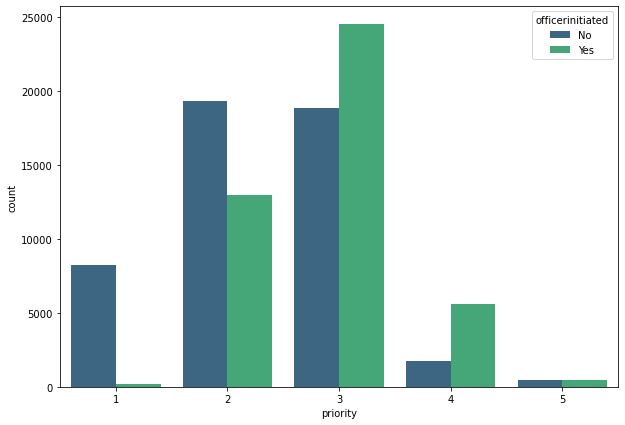

In [15]:
## priority מחיקת ערכים לא ידועים בעמודת 
police = police.drop(police[police['priority']=='P'].index)
police = police.drop(police[police['priority']==' '].index)
plt.figure(figsize=(10,7))
sns.countplot(x='priority',data=police ,hue='officerinitiated',palette='viridis')

##### אנו שיערנו שבמרבית האירועים בעלי רמת תעדוף 1, יהיה קצין באירוע עקב חומרתו
##### אך ניתן לראות שברמת סיווג 1, דווקא יש את היחס הנמוך ביותר בין כמות הקריאות בהם נכח קצין לעומת אלו שלא.
##### יחס זה עולה ככל שהרמת תעדוף יורדת. 
##### ניתן להניח שבאירועים שבהם יש עדיפות לצאת כמה שיותר מהר, מעדיפים לשלוח ניידת מבלי לחכות לקצין שיגיע למקום הקריאה.

### השכונה 'מידטאון' בעלת מספר השיחות הגבוה ביותר

In [16]:
groupby_neighborhood=police.groupby('neighborhood')[['oid']].count().sort_values('oid', ascending=False)
max_neighborhood=groupby_neighborhood.reset_index().head(1)
name_max_neighborhood=max_neighborhood['neighborhood'].iloc[0]
name_max_neighborhood

'Midtown'

### מיפוי האזורים בתוך השכונה מידטאון לפי מספר שיחות

In [17]:
import folium
from folium.plugins import HeatMap
# הקורדינטות של דטרויט הם 42.3314, -83.0458
basemap = folium.Map(location=[42.3314, -83.0458], zoom_start=11.2)

# Creating lists with lat and lng data points
lat = police[police['neighborhood'] == name_max_neighborhood].latitude.tolist()
lng = police[police['neighborhood'] == name_max_neighborhood].longitude.tolist()

# Adding the heatmap layer
HeatMap(list(zip(lat, lng)),radius=10,).add_to(basemap)

# Plotting the map
basemap

##### מסקנה: בהתחלה כשרואים את המפת חום בתצוגה הראשונית, ניתן לראות שרוב השיחות מתקבלות בצד ימין למעלה של המפה.
##### ככל כשנתקרב נראה איפה האזורים "הבעייתיים", בצד ימין למעלה אחרי הגדלה יש ריכוז שיחות בצומת המרכזית.
##### אנו ממליצים להציב במיקום זה ניידת, אשר תוכל להגיע למקום הקריאה בהקדם האפשרי ולטפל במרבית הקריאות עוד בטרם פתיחתם במוקד.

### ולקינוח.. שיחה שלא תועדה בקובץ

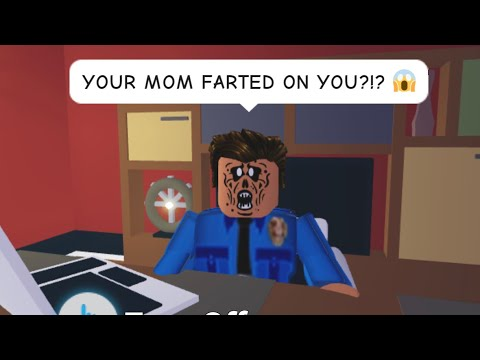

In [18]:
from IPython.display import Audio,Image, YouTubeVideo
id='gzUjMst68BU'
YouTubeVideo(id=id,width=600,height=300)
#https://youtu.be/gzUjMst68BU
#_WTlPoa3C7Y